# Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

### Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/bigdatamart_Train")
df_test = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/bigdatamart_Test")

In [3]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(df_train.shape, df_test.shape)

(8523, 12) (5681, 11)


In [6]:
df_train.isnull().sum()*100/len(df_train)  # checking percentage of null values present in the dataset

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<AxesSubplot:>

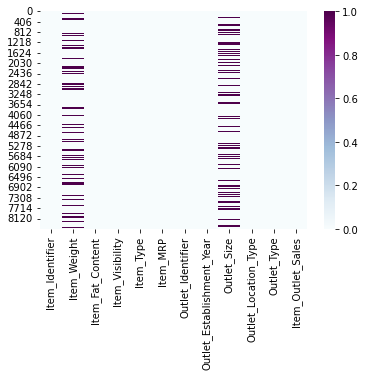

In [7]:
sns.heatmap(df_train.isnull(), cmap = "BuPu")

In [8]:
df_test.isnull().sum()*100/len(df_test) # checking percentage of null values present in the dataset

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

<AxesSubplot:>

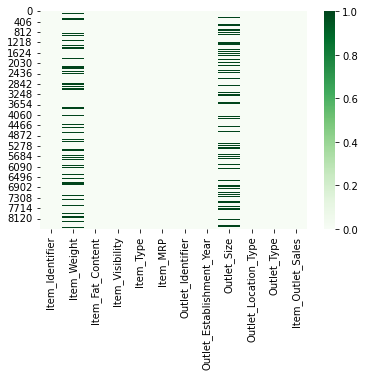

In [9]:
sns.heatmap(df_train.isnull(), cmap = "Greens")

In [10]:
df_train.info()  # checking data types of the columns dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df_test.info()   # checking data types of the columns dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7717,NCC30,16.60,Low Fat,0.027574,Household,176.6344,OUT035,2004,Small,Tier 2,Supermarket Type1,2676.5160
8302,FDY20,12.50,Regular,0.082215,Fruits and Vegetables,91.4488,OUT017,2007,NaN,Tier 2,Supermarket Type1,1086.5856
666,FDS19,13.80,Regular,0.064154,Fruits and Vegetables,76.9012,OUT013,1987,High,Tier 3,Supermarket Type1,607.2096
5404,FDA55,NaN,Regular,0.099780,Fruits and Vegetables,225.2088,OUT019,1985,Small,Tier 1,Grocery Store,447.4176
1425,FDE59,12.15,Low Fat,0.062640,Starchy Foods,36.6532,OUT017,2007,NaN,Tier 2,Supermarket Type1,251.6724


In [13]:
df_train.Item_Weight.sample(5) # checking null values column

2379     9.00
2537    19.35
8228    18.60
6549    16.20
8102    18.10
Name: Item_Weight, dtype: float64

In [14]:
df_test.Item_Weight.sample(5)  # checking null values column

5672     6.86
1539     7.21
1675     9.60
5540    15.75
5013    21.25
Name: Item_Weight, dtype: float64

In [15]:
df_train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
df_test.Outlet_Size.unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

#### From above code we find that outlet dataset columns has 3 unique values ie ['Medium', 'High', 'Small']

## Cleaning of the dataset

### For Item Weight

<AxesSubplot:xlabel='Item_Weight'>

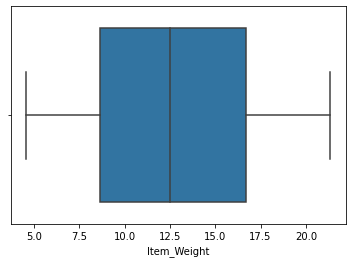

In [17]:
sns.boxplot(df_test.Item_Weight)

<AxesSubplot:xlabel='Item_Weight'>

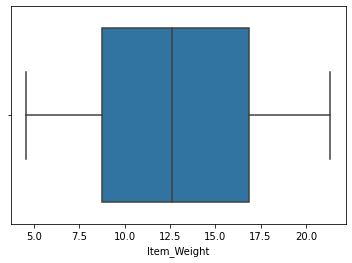

In [18]:
sns.boxplot(df_train.Item_Weight)

#### From above visuals we conclude that there is no outliers present hence filling the NaN values with mean of the dataset are okay

In [19]:
df_test.Item_Weight.fillna(df_test.Item_Weight.mean(), inplace = True)   # filling null values
df_train.Item_Weight.fillna(df_train.Item_Weight.mean(), inplace = True)

In [20]:
print(df_train.Item_Weight.isnull().sum(), df_test.Item_Weight.isnull().sum())

0 0


## For Outlet Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

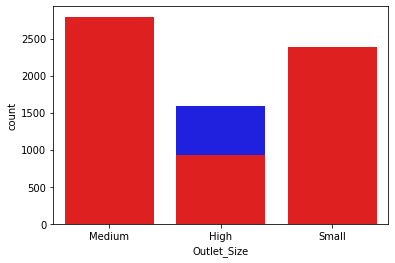

In [21]:
sns.countplot(df_test.Outlet_Size, color = 'blue')
sns.countplot(df_train.Outlet_Size, color = 'red')

### From above code we find that Medium outlet are much higher that other outlet sizes hence we are considering mode to fill NaN cases

In [22]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace = True)

In [23]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace = True)

In [24]:
print(df_train['Outlet_Size'].isnull().sum(), df_test['Outlet_Size'].isnull().sum() )

0 0


<AxesSubplot:>

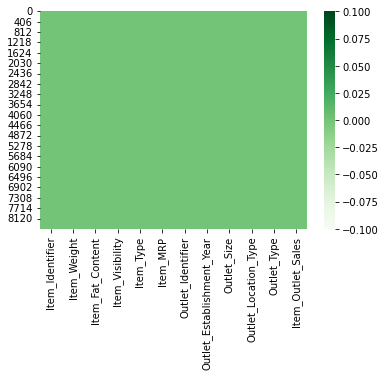

In [25]:
sns.heatmap(df_train.isnull(), cmap = "Greens")

<AxesSubplot:>

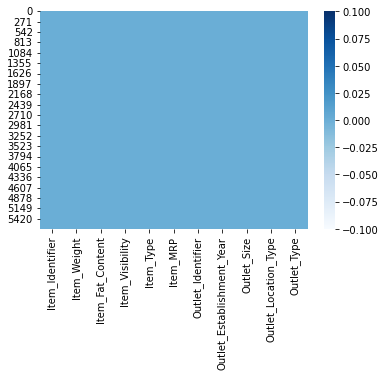

In [26]:
sns.heatmap(df_test.isnull(), cmap = "Blues")

In [27]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [28]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Checking Unique values of object dataset

In [29]:
df_train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [30]:
df_test.apply(lambda x : len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [31]:
df_train.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [32]:
df_train.pivot_table(values='Outlet_Type',
                  columns='Outlet_Identifier',
                  aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [33]:
df_train_Item_Identifier = df_train.pivot_table(values = "Item_Weight", index = "Item_Identifier")
print(df_train_Item_Identifier)

                 Item_Weight
Item_Identifier             
DRA12              11.600000
DRA24              17.495041
DRA59               9.416911
DRB01               9.212548
DRB13               6.115000
...                      ...
NCZ30               7.485378
NCZ41              19.850000
NCZ42              10.500000
NCZ53              10.251529
NCZ54              14.137899

[1559 rows x 1 columns]


In [34]:
df_train.Item_Identifier.unique().shape

(1559,)

In [35]:
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### From above code we find that Low Fat, low fat, LF are all equal and Regular, reg are equals

In [36]:
df_train.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat', inplace = True)

In [37]:
df_test.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat', inplace = True)

In [38]:
df_train.Item_Fat_Content.replace('reg', 'Regular', inplace = True)

In [39]:
df_test.Item_Fat_Content.replace('reg', 'Regular', inplace = True)

In [40]:
df_test.Item_Fat_Content.unique()  # making it according to dataset

array(['Low Fat', 'Regular'], dtype=object)

In [41]:
df_train.Item_Type.unique().shape

(16,)

In [42]:
df_test.Outlet_Type.unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [43]:
df_test.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [44]:
df_train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [45]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

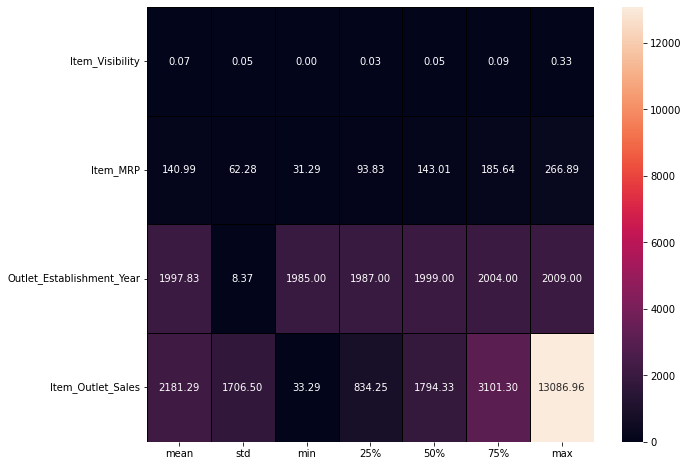

In [46]:
plt.figure(figsize = (10,8))
sns.heatmap(df_train.describe()[1:].transpose()[1:], fmt = ".2f", linecolor='black', linewidths='1', annot = True)

### Outlet sales having max value is much higher than rest of the data hence it has outlier present in the data set 

## Dividing columns into object and integer types 

In [47]:
df_train_objects = df_train.select_dtypes(include = ['object']).columns
df_train_objects = df_train_objects.drop("Item_Identifier")  # Item identifier drop due to high unique values

In [48]:
df_test_objects = df_test.select_dtypes(include = ['object']).columns
df_test_objects = df_test_objects.drop(["Item_Identifier"])   # Item identifier drop due to high unique values

In [49]:
df_train_continuos = df_train.select_dtypes(exclude = ['object']).columns
df_train_continuos = df_train_continuos.drop("Outlet_Establishment_Year")

In [50]:
df_test_continuos = df_test.select_dtypes(exclude = ['object']).columns
df_test_continuos = df_test_continuos.drop("Outlet_Establishment_Year")

### Bar Plot

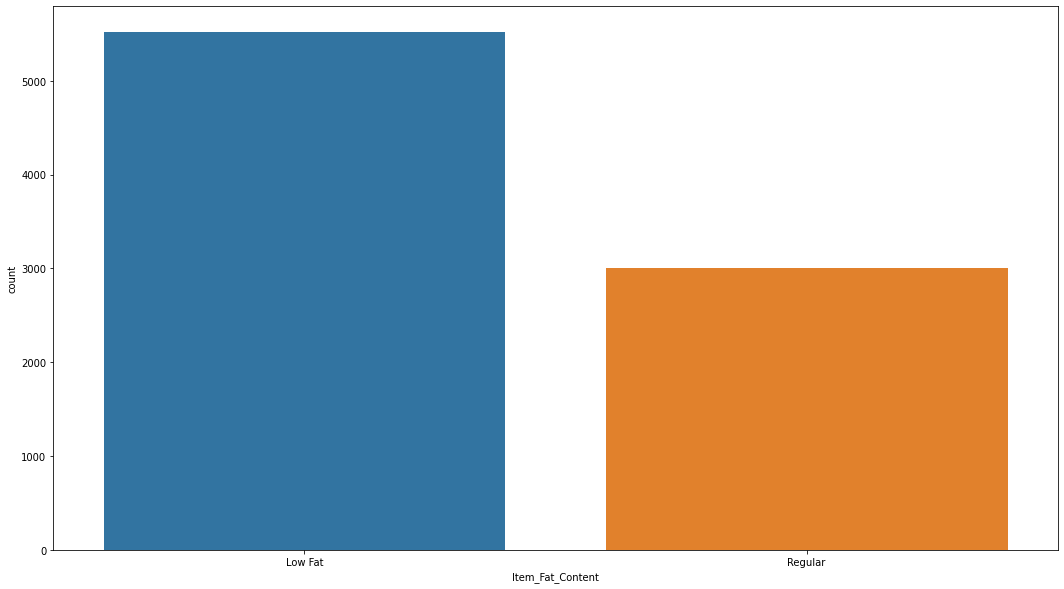

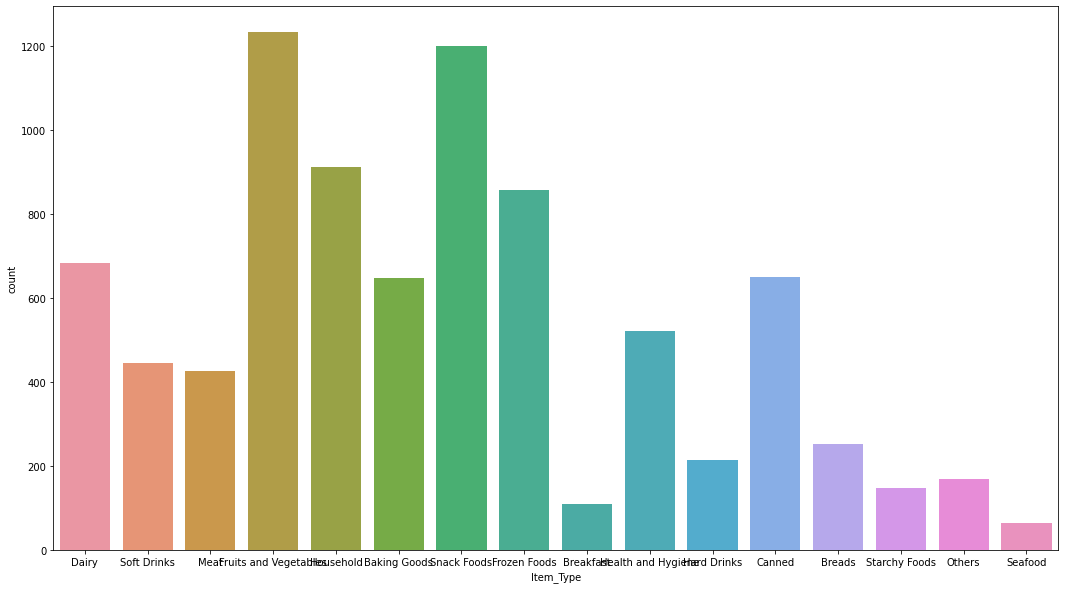

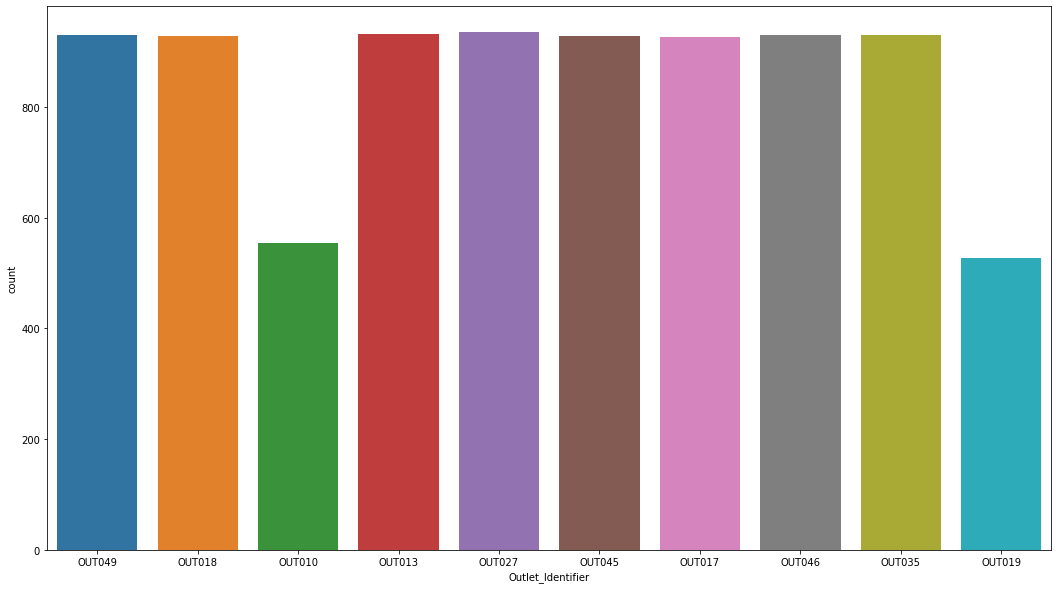

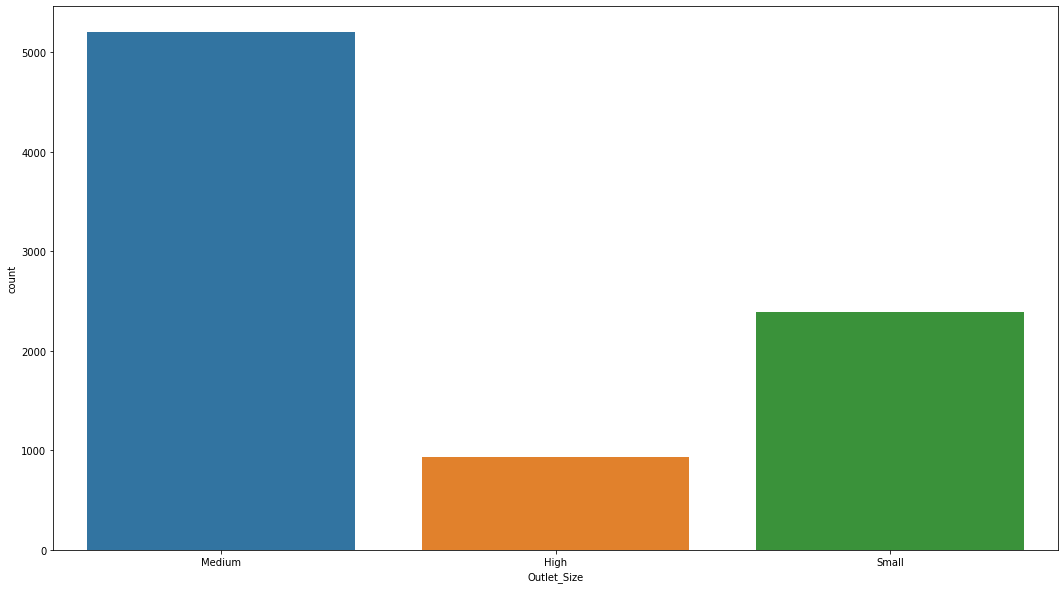

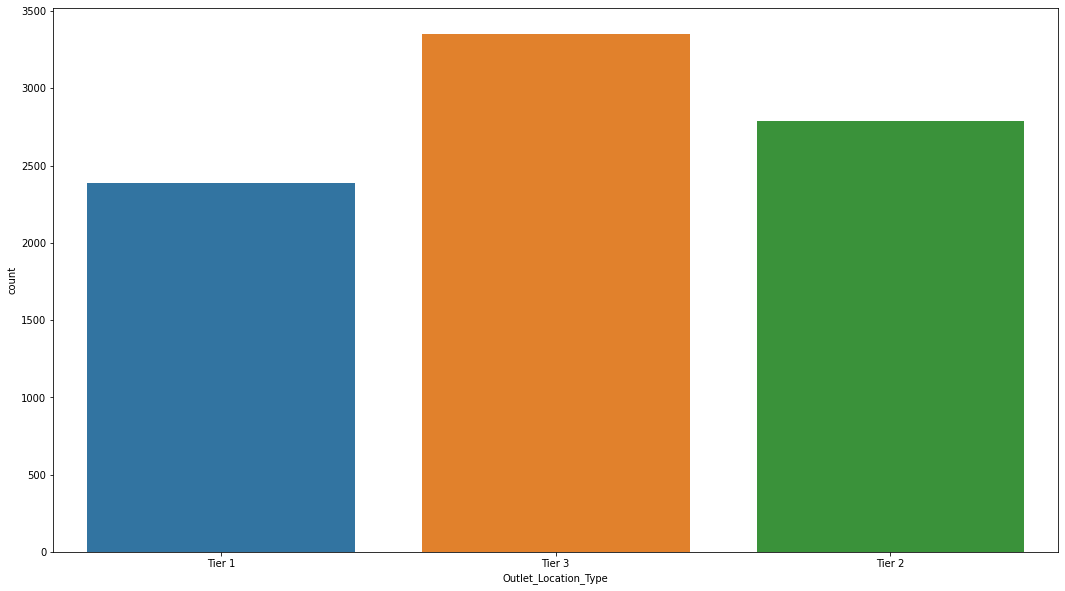

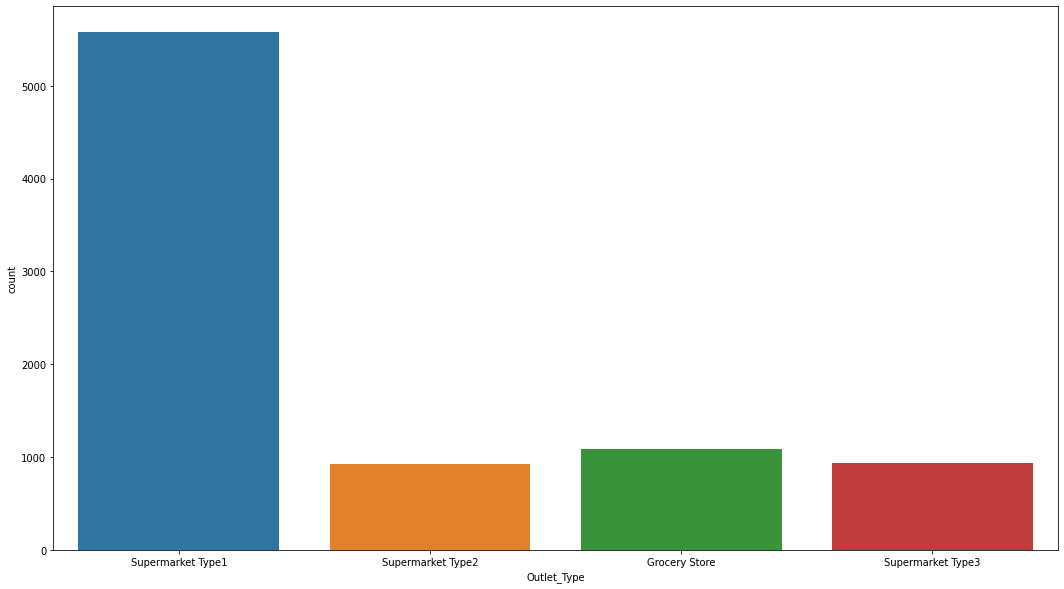

In [51]:
for i in df_train_objects:
    
    plt.figure(figsize = (18,10))
    sns.countplot(x = i, data = df_train)
    plt.show()

#### From above code we can find that no. of unique values present in object dataset

### Pie Chart for checking percentage occupied by unique values

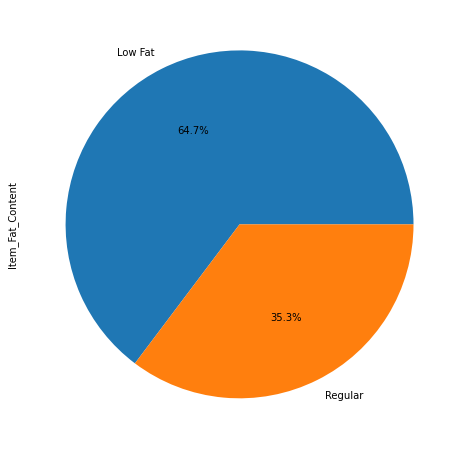

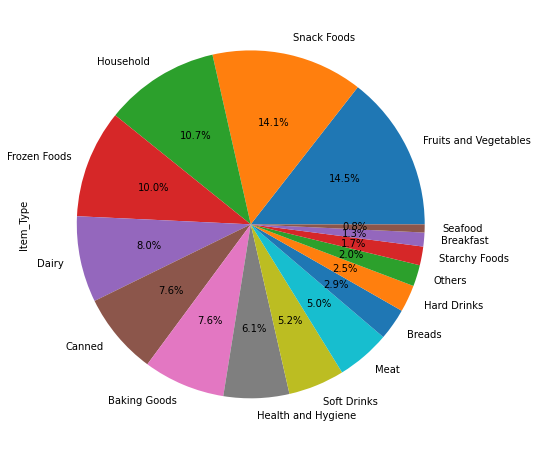

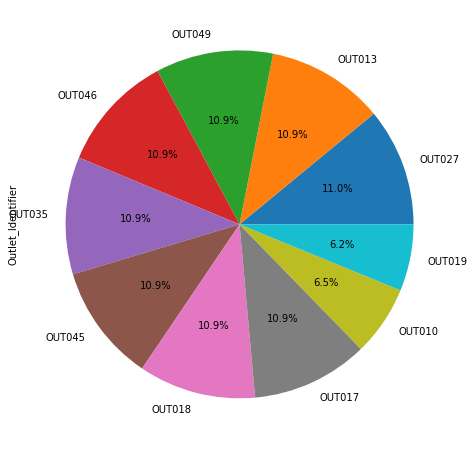

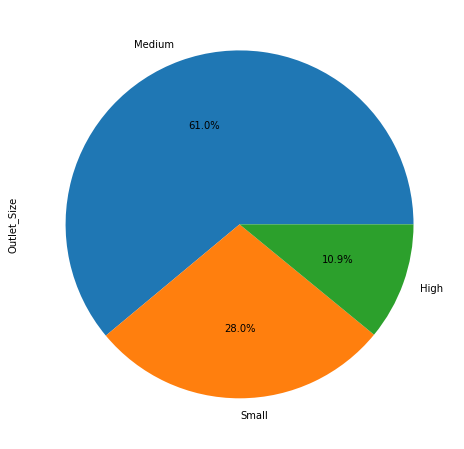

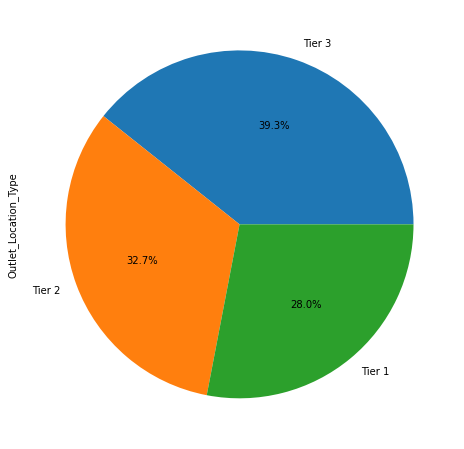

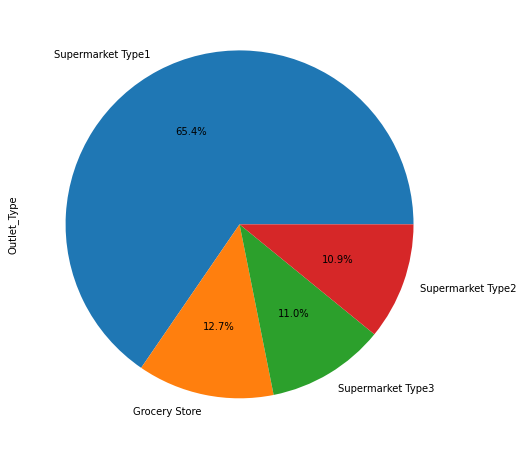

In [52]:
for i in df_train_objects:
    plt.figure(figsize = (8,8))
    df_train[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

#### checking percentage of data occupied by unique values

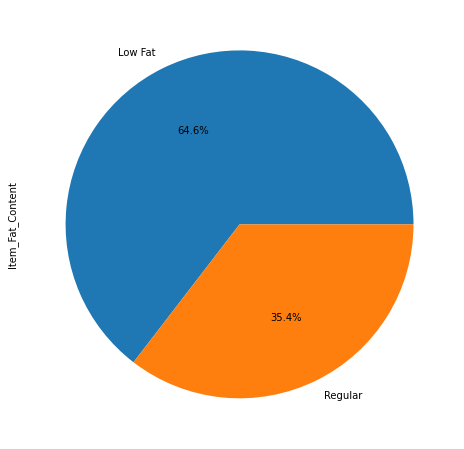

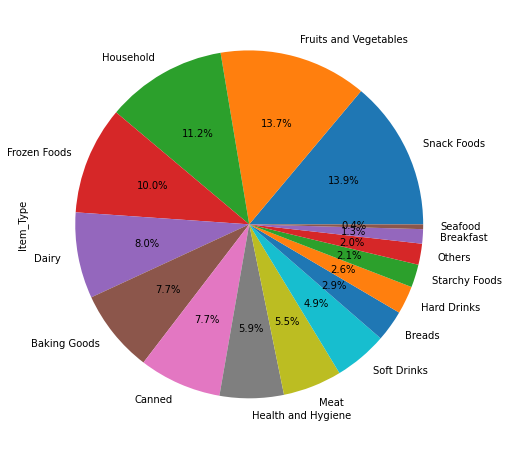

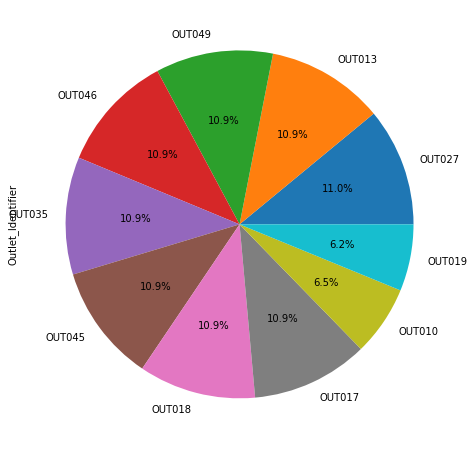

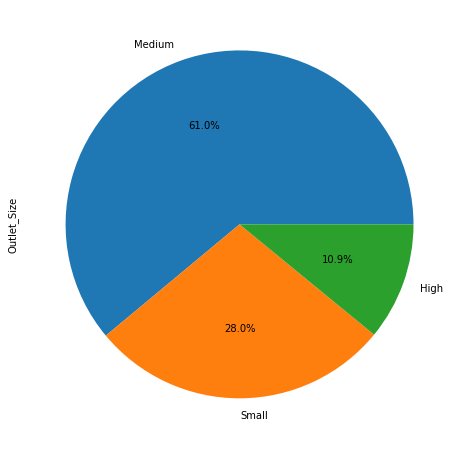

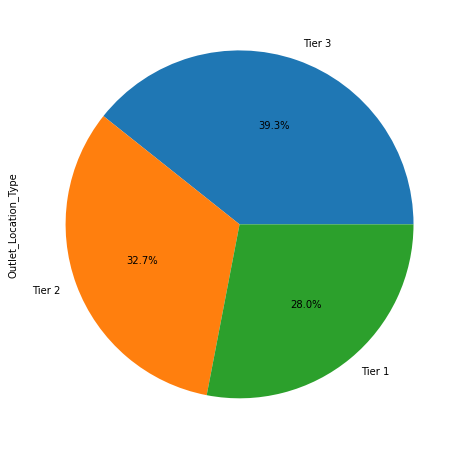

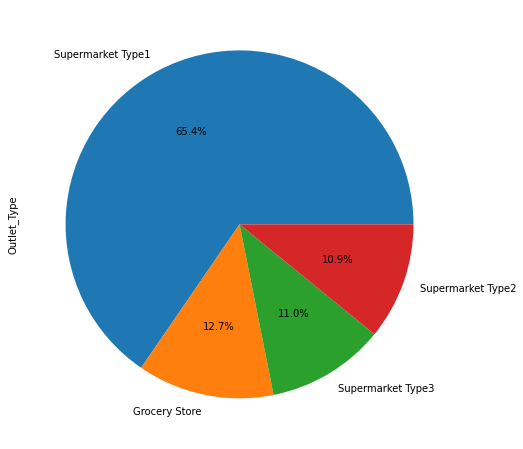

In [53]:
for j in df_test_objects:
    plt.figure(figsize = (8,8))
    df_test[j].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.show()

#### checking percentage of data occupied by unique values

#### 

In [54]:
#df_train['Item_Identifier']
#print('\n%s column: '%)
print(df_train['Item_Identifier'].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


# Checking Outlet effectness on sales

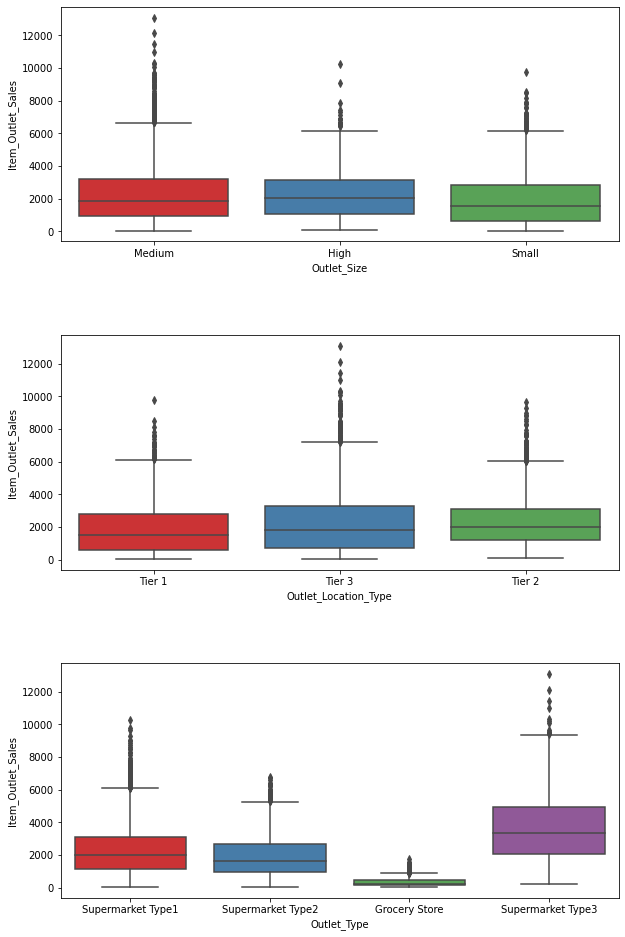

In [55]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data = df_train, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = df_train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

Medium size outlet values show more sales.

Outlet_Location_Type Tier3 shows more sales then rest ones

Supermarket Type3 shows more sales then rest markets

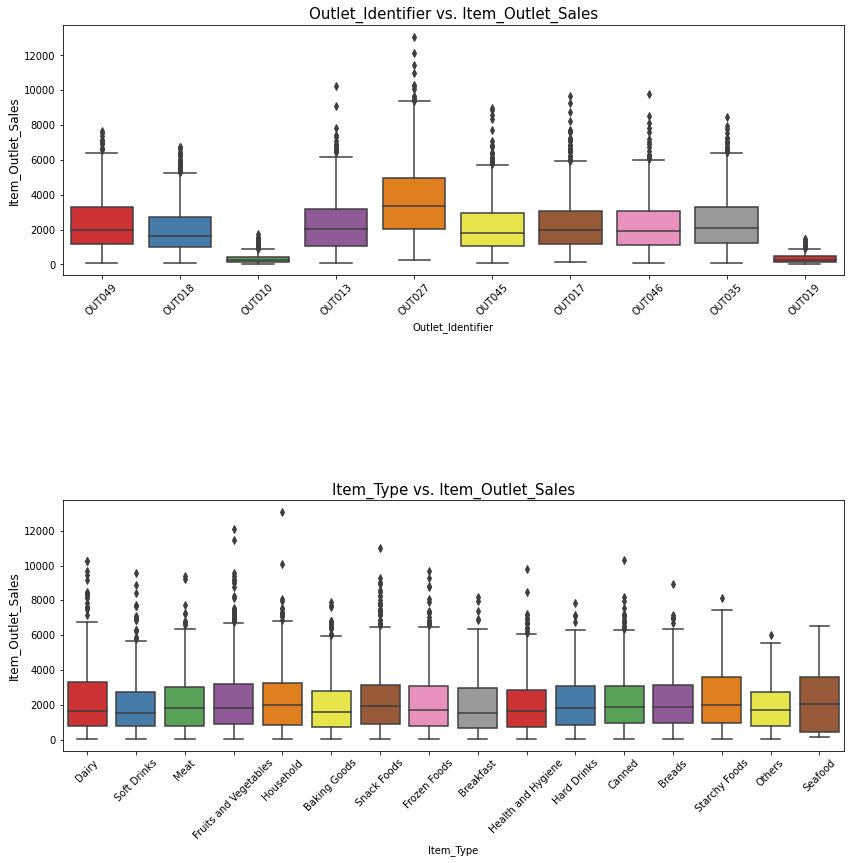

In [56]:
plt.figure(figsize = (14,13))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df_train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

OUT027 shows higher sales.

Dairy, Snacks foods and seafoods shows more sales rather than other products

#### 

# Outlet_Establishment_Year vs Sales

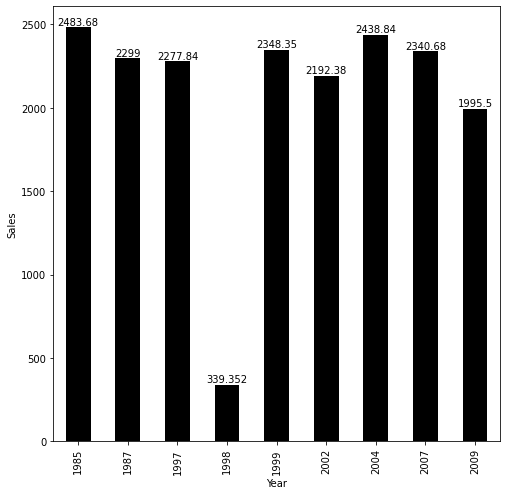

In [57]:

df = df_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
plt.figure(figsize = (8,8))
df_Outlet_Establishment_Year = df.plot(kind = 'bar', color = 'k')
df_Outlet_Establishment_Year.set_xlabel("Year")
df_Outlet_Establishment_Year.set_ylabel("Sales")

for i in df_Outlet_Establishment_Year.containers:
    df_Outlet_Establishment_Year.bar_label(i)


#### 

# Outlet_Establishment_Year vs Number of outlet build in different years

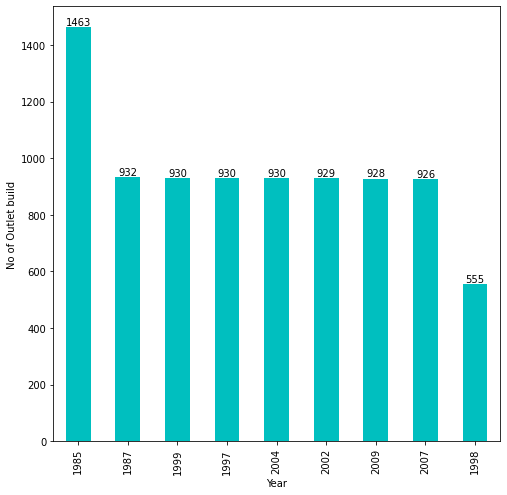

In [58]:
Outlet_Establishment_Year = df_train['Outlet_Establishment_Year'].value_counts()
plt.figure(figsize = (8,8))
df_Outlet_Establishment_Year = Outlet_Establishment_Year.plot(kind = 'bar', color = 'c')
df_Outlet_Establishment_Year.set_xlabel("Year")
df_Outlet_Establishment_Year.set_ylabel("No of Outlet build")

for i in df_Outlet_Establishment_Year.containers:
    df_Outlet_Establishment_Year.bar_label(i)

In [60]:
df_train['year'] = 2013 - df_train['Outlet_Establishment_Year']
df_test['year'] = 2013 - df_test['Outlet_Establishment_Year']

### From above observations we find that Outlet Establishment Year and Item Identifier are not dependent variable to the output sales hence we can drop it for better model predictions

In [61]:
df_train.drop(['Item_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [62]:
df_test.drop(['Item_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [63]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,year
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


# Continuous values Ploting

# Scatter Plot

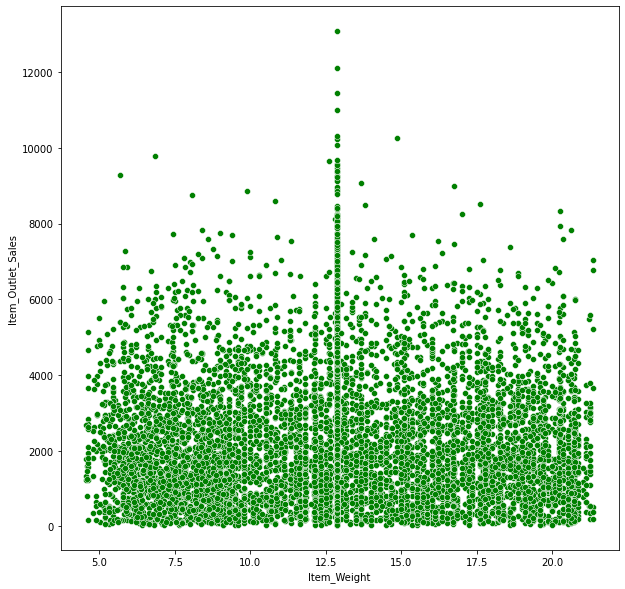

In [64]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = df_train, color = 'g')
plt.show()

### From above code we measure that weights are distributed equaly to the sales

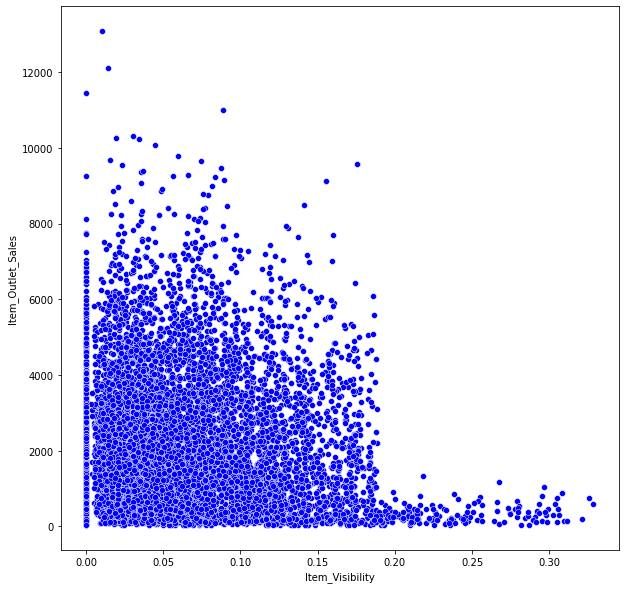

In [65]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df_train, color = 'b')
plt.show()

### From above graph we can say that item visibility having max range between 0 ot 0.20 

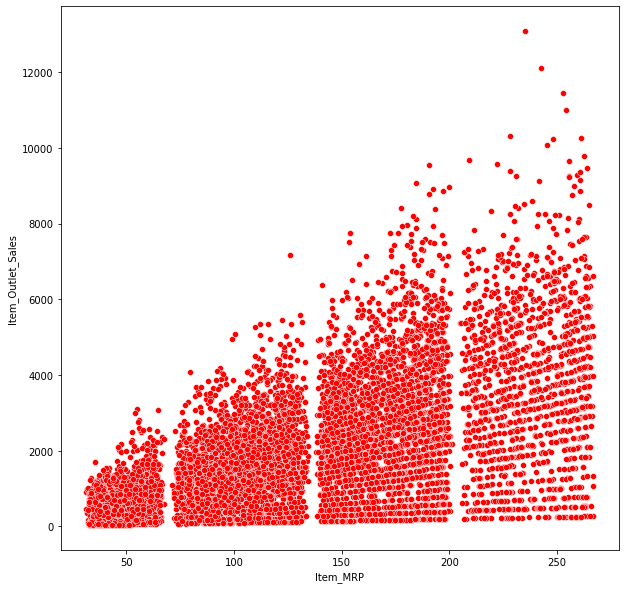

In [66]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = df_train, color = 'r')
plt.show()

### Item MRP are divided in the range of 4 four parts as per above graph

#### 

## Bivariate Analysis

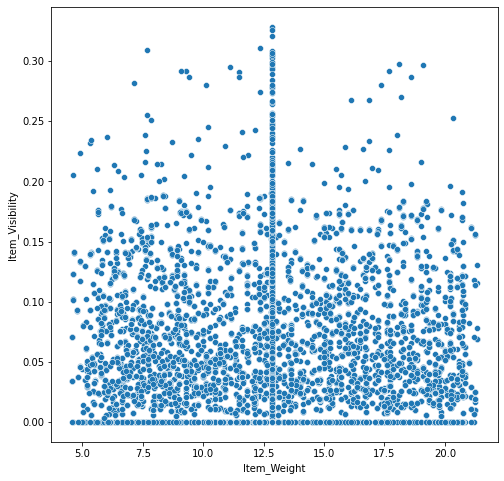

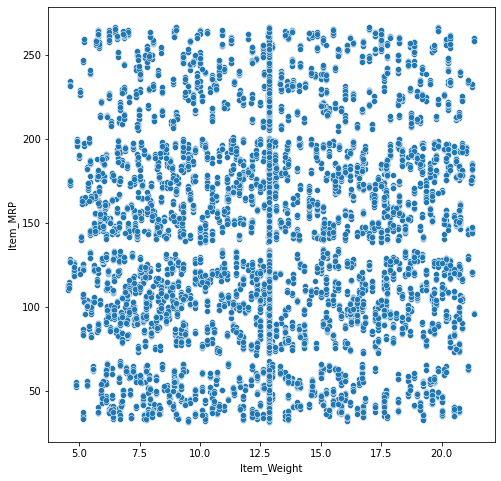

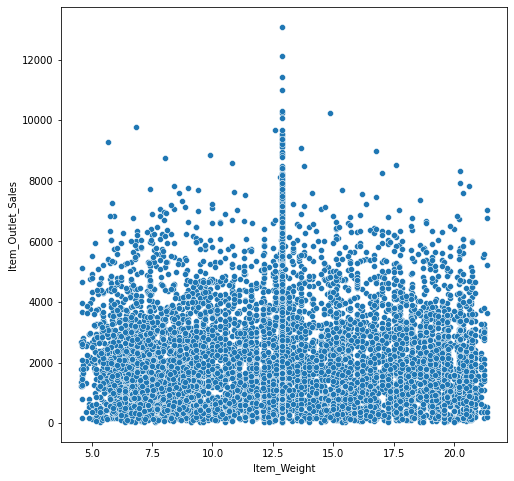

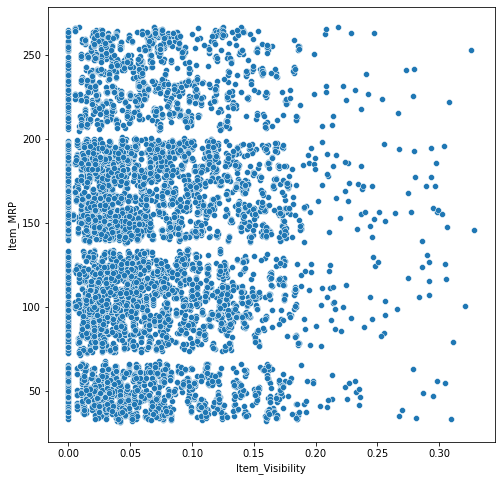

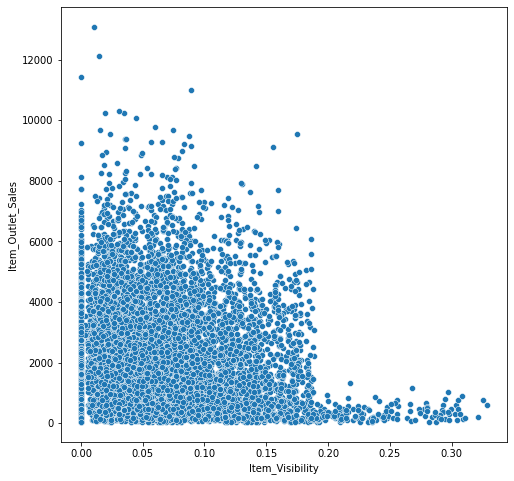

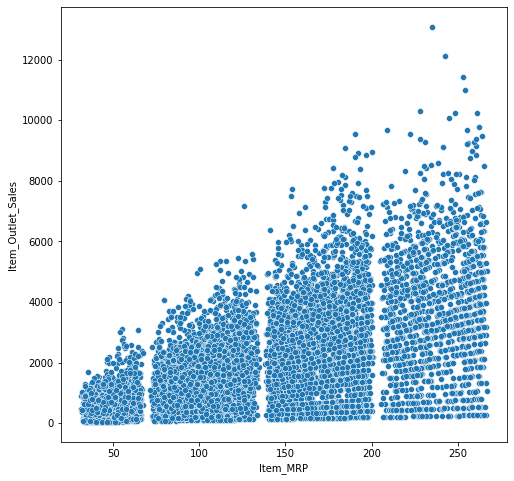

In [67]:
for i in range(len(df_train_continuos)):
    for j in df_train_continuos[i+1:]:
        plt.figure(figsize = (8,8))
        sns.scatterplot(df_train[df_train_continuos[i]], df_train[j])

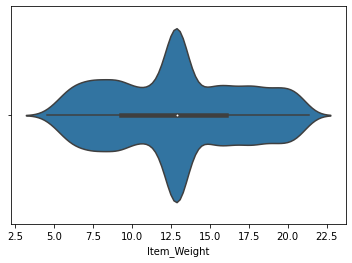

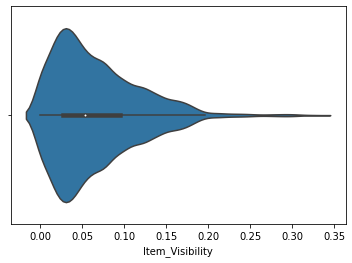

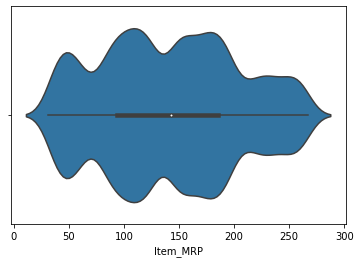

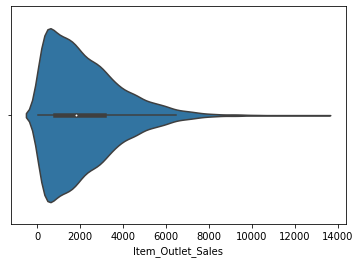

In [68]:
for i in df_train_continuos:
    sns.violinplot(df_train[i])
    plt.show()

<Figure size 1008x936 with 0 Axes>

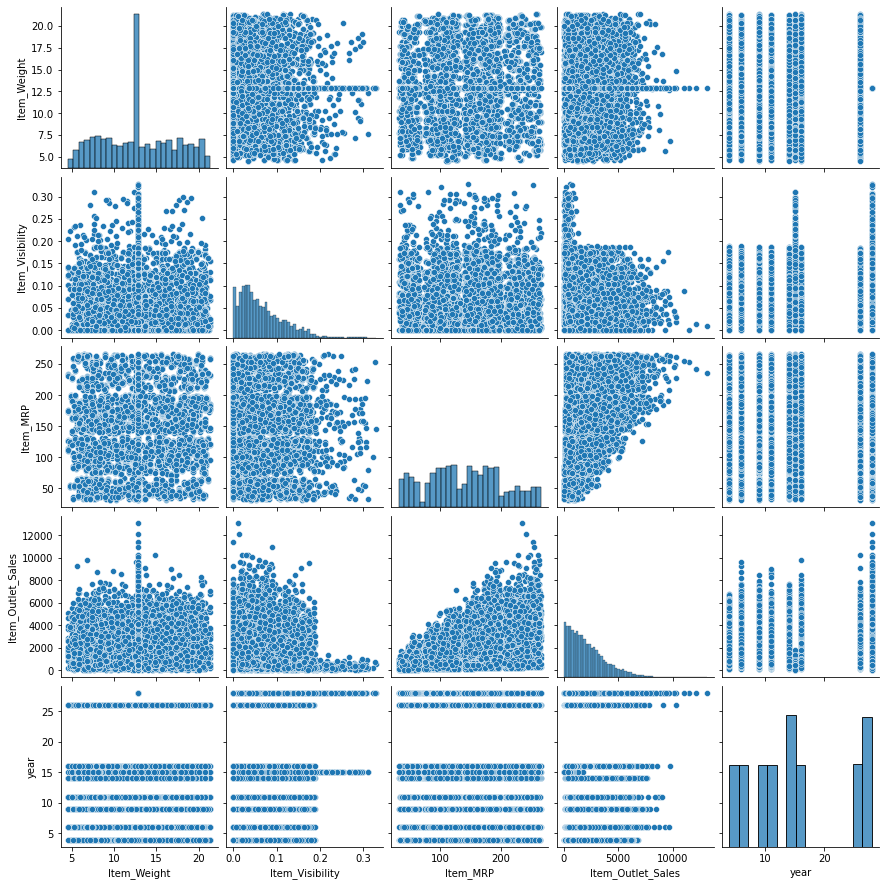

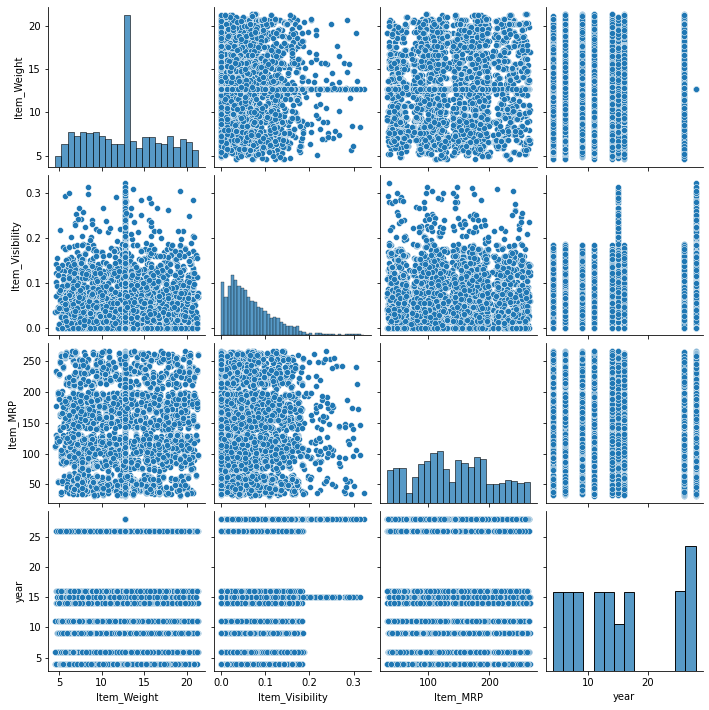

In [69]:
plt.figure(figsize = (14,13))

sns.pairplot(df_train)

sns.pairplot(df_test)

# Observations
From pairplot we observe that Item_outlet_sales is right skewed hence we need to fit for better model predictions

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

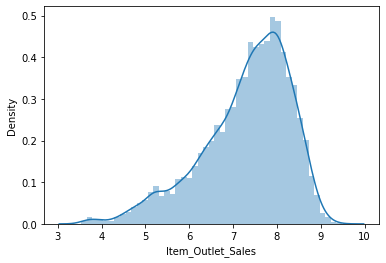

In [70]:
df_train['Item_Outlet_Sales'] = np.log(1 + df_train['Item_Outlet_Sales'])
sns.distplot(df_train['Item_Outlet_Sales'])

# Converting object values for data processing

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   #We use label encoder because dataset having so many unique categorical values

In [72]:
for i in df_train.select_dtypes(include = 'object').columns:
    df_train[i] = le.fit_transform(df_train[i])

In [73]:
for i in df_test.select_dtypes(include = 'object').columns:
    df_test[i] = le.fit_transform(df_test[i])

In [74]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,year
0,9.30,0,0.016047,4,249.8092,9,1,0,1,8.225808,14
1,5.92,1,0.019278,14,48.2692,3,1,2,2,6.096776,4
2,17.50,0,0.016760,10,141.6180,9,1,0,1,7.648868,14
3,19.20,1,0.000000,6,182.0950,0,1,2,0,6.597664,15
4,8.93,0,0.000000,9,53.8614,1,0,2,1,6.903451,26


# Checking Outliers

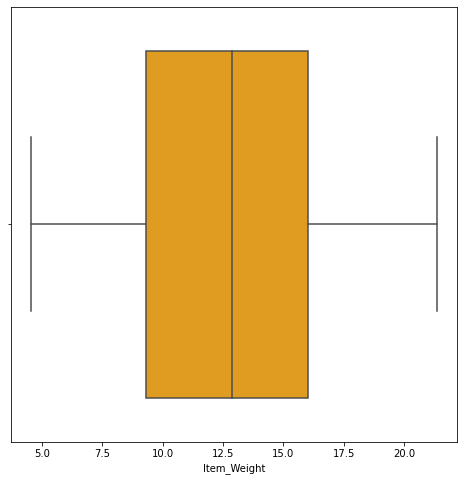

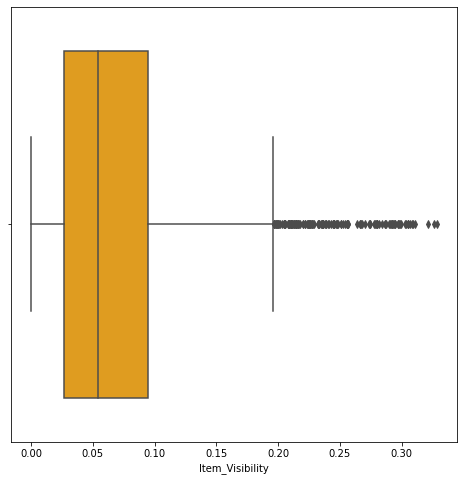

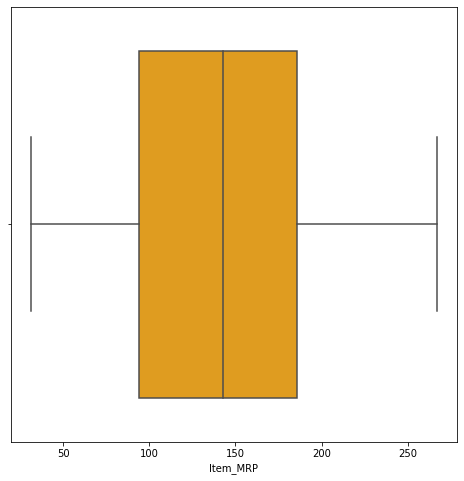

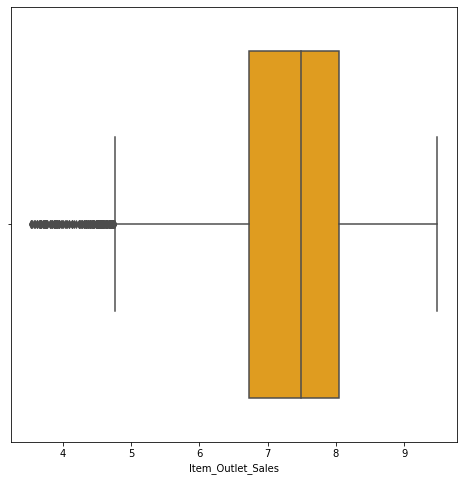

In [75]:
for i in df_train.select_dtypes('float').columns:
    plt.figure(figsize = (8,8))
    sns.boxplot(df_train[i], color = 'orange')

#### From above code we find that item fat content, Item visibility, Outlet type, Item_outlet_sales having outliers,

From above code we find that item fat content, Item visibility, Outlet type, Item_outlet_sales having outliers,

# Removing Outliers

In [76]:
from scipy.stats import zscore

z_train = np.abs(zscore(df_train))
z_test = np.abs(zscore(df_test))

In [77]:
df_z = df_train[(z_train<3).all(axis = 1)]

In [78]:
df_z1 = df_test[(z_test<3).all(axis = 1)]

# Percentage of Data Loss

In [79]:
print(df_train.shape)
print(df_z.shape) 
print(df_test.shape)
print(df_z1.shape)

(8523, 11)
(8372, 11)
(5681, 10)
(5600, 10)


In [80]:


print('Percentage of Data loss of train dataset', (8523-8372)/8523*100)
print('Percentage of Data loss of test dataset', (5681-5600)/5681*100)

Percentage of Data loss of train dataset 1.7716766396808636
Percentage of Data loss of test dataset 1.425805315965499


# From above code we find that there is not much data loss hence we are considering Zscore method for outliers removal

#### 

In [81]:
df_train = df_z
df_test = df_z1

# Checking Outliers Again

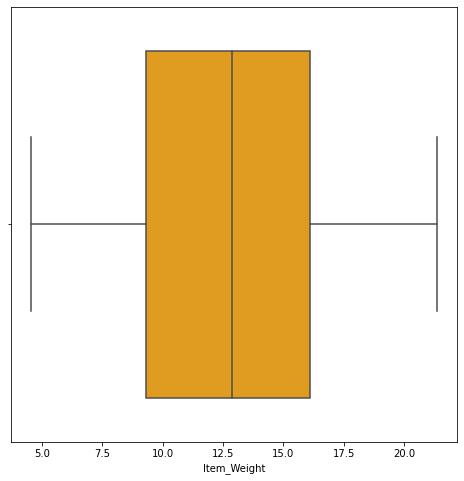

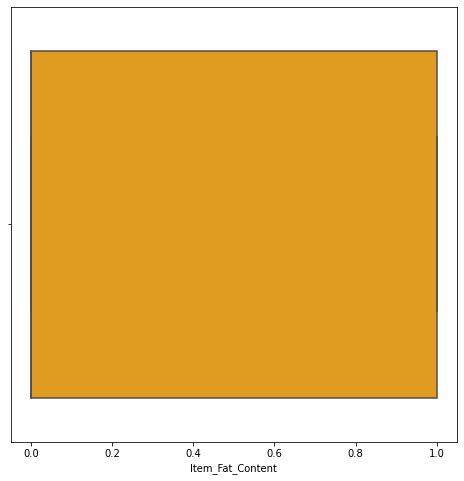

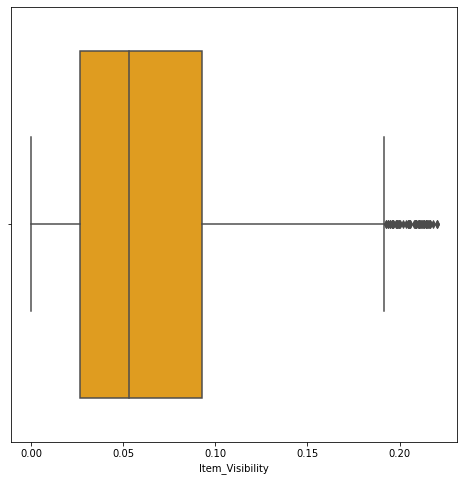

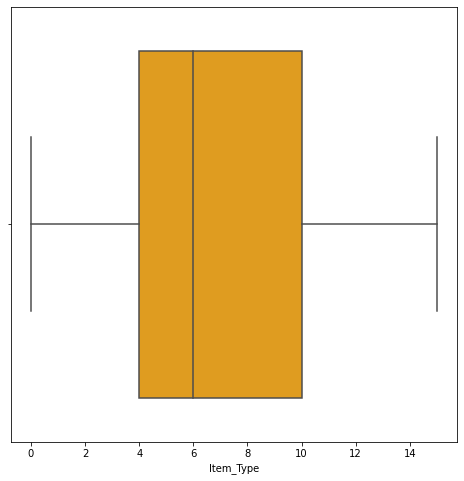

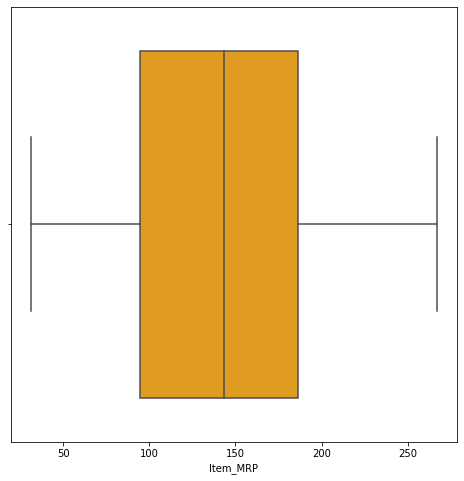

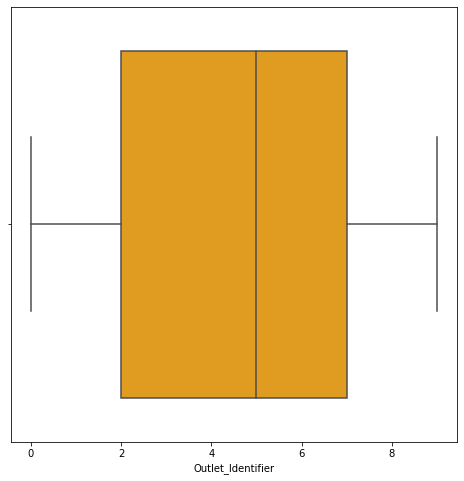

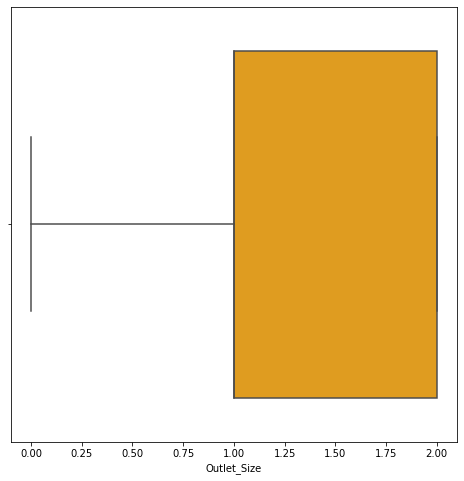

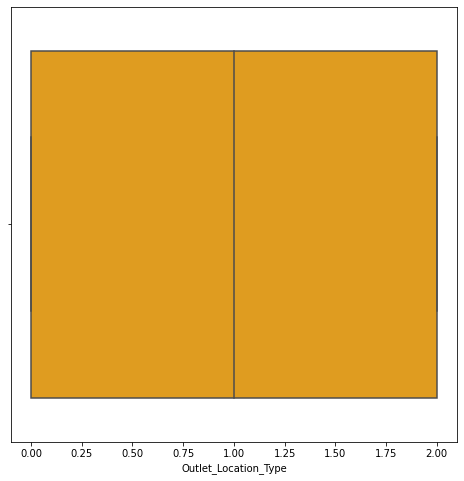

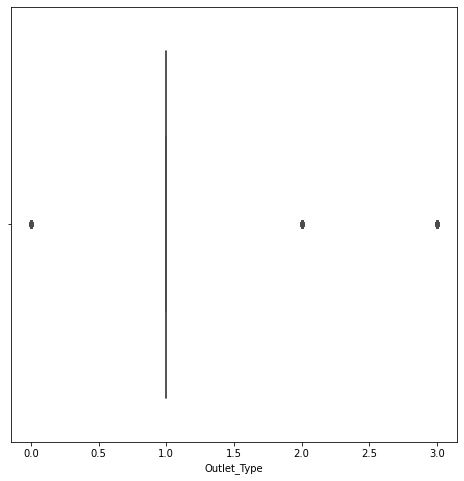

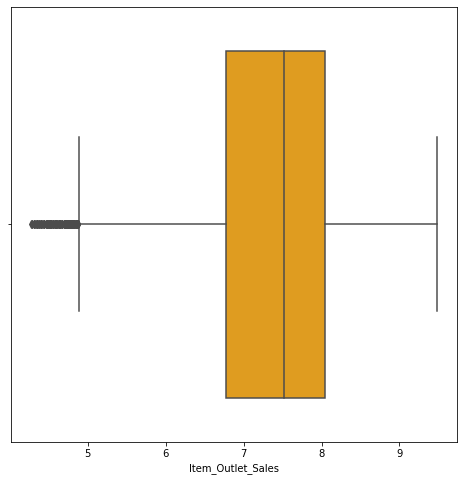

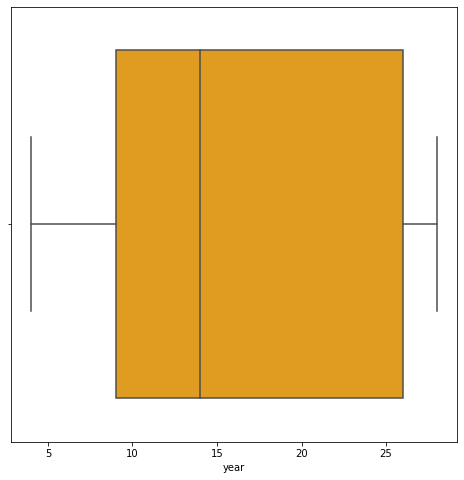

In [82]:
for i in df_train:
    plt.figure(figsize = (8,8))
    sns.boxplot(df_train[i], color = 'orange')

### From above code we find that some of the outliers are removed

#### 

# Checking Skewness

In [83]:
df_train_values = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
df_test_values = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP']]

In [84]:
df_train_values.skew()

Item_Weight          0.089857
Item_Visibility      0.799065
Item_MRP             0.125862
Item_Outlet_Sales   -0.771083
dtype: float64

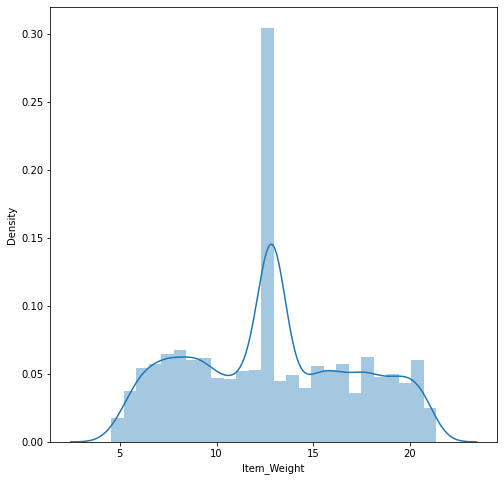

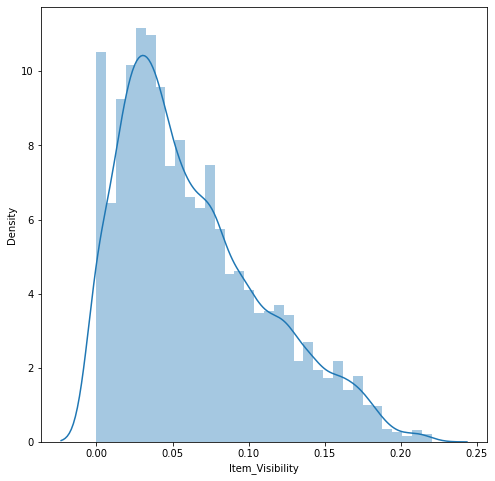

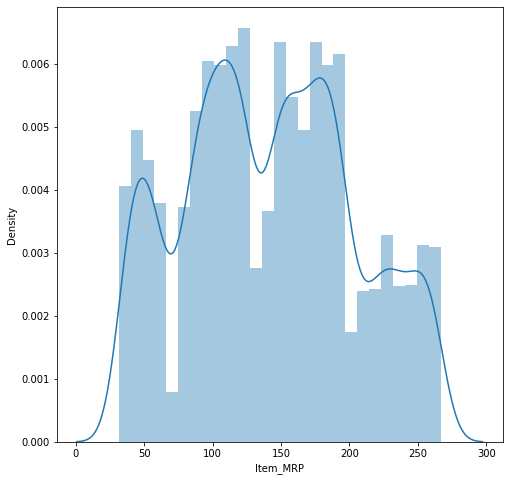

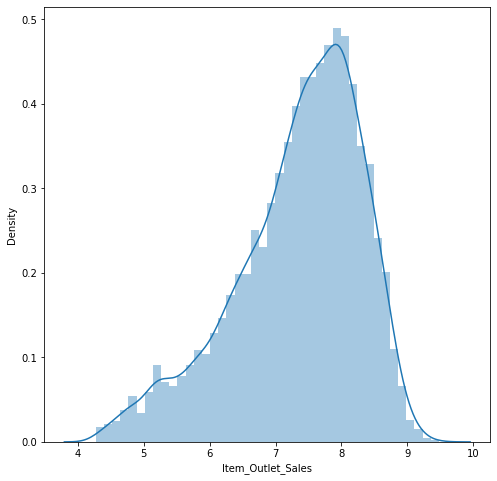

In [85]:
for i in df_train_values:
    plt.figure(figsize = (8,8))
    sns.distplot(df_train_values[i], kde = 'False')

#### From above code we find that Outlet sales ie our target variable is right skewed and this need to be manage for better model predictions 

# Now outlet sales becomes likely to a normal distribution curve

In [86]:
df_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,year
Item_Weight,1.000000,-0.020680,-0.010330,0.028262,0.024847,-0.009152,-0.007524,0.004945,-0.001320,0.006469,0.008241
Item_Fat_Content,-0.020680,1.000000,0.044695,-0.141941,0.007781,0.003377,-0.002288,-0.001030,0.006668,0.021581,-0.005553
Item_Visibility,-0.010330,0.044695,1.000000,-0.037023,0.005662,-0.068435,0.041203,-0.013231,-0.116517,-0.127128,0.037448
Item_Type,0.028262,-0.141941,-0.037023,1.000000,0.031294,0.001673,-0.002183,0.003453,0.003319,0.021941,-0.005328
Item_MRP,0.024847,0.007781,0.005662,0.031294,1.000000,-0.007765,0.010557,0.000902,-0.017650,0.505774,0.001250
Outlet_Identifier,-0.009152,0.003377,-0.068435,0.001673,-0.007765,1.000000,0.515298,-0.723553,0.078549,0.241262,-0.077134
Outlet_Size,-0.007524,-0.002288,0.041203,-0.002183,0.010557,0.515298,1.000000,-0.607690,-0.189965,-0.104994,-0.218934
Outlet_Location_Type,0.004945,-0.001030,-0.013231,0.003453,0.000902,-0.723553,-0.607690,1.000000,0.476151,0.053871,0.112955
Outlet_Type,-0.001320,0.006668,-0.116517,0.003319,-0.017650,0.078549,-0.189965,0.476151,1.000000,0.450015,0.149949
Item_Outlet_Sales,0.006469,0.021581,-0.127128,0.021941,0.505774,0.241262,-0.104994,0.053871,0.450015,1.000000,-0.047085


<AxesSubplot:>

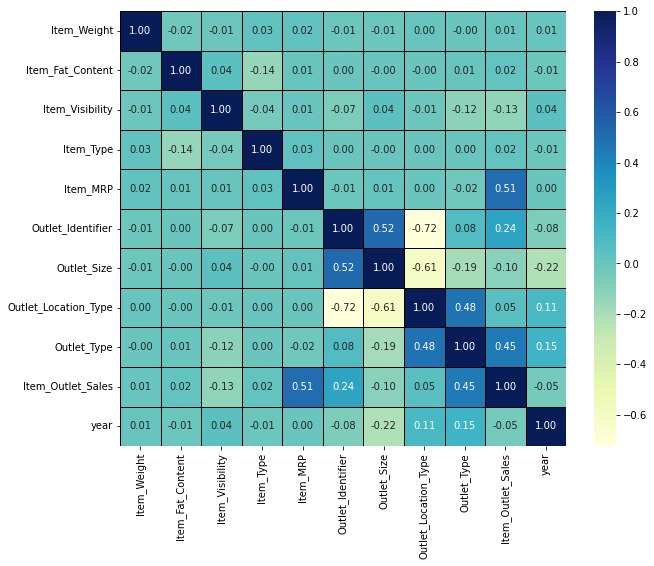

In [87]:
plt.figure(figsize = (10,8))
sns.heatmap(df_train.corr(), annot = True, fmt = ".2f", linecolor='black', linewidths='1', cmap="YlGnBu")

From above visualization we find that Outlet size and item visibility having positive correlation rest dataset having negative correlation with the datset

<AxesSubplot:>

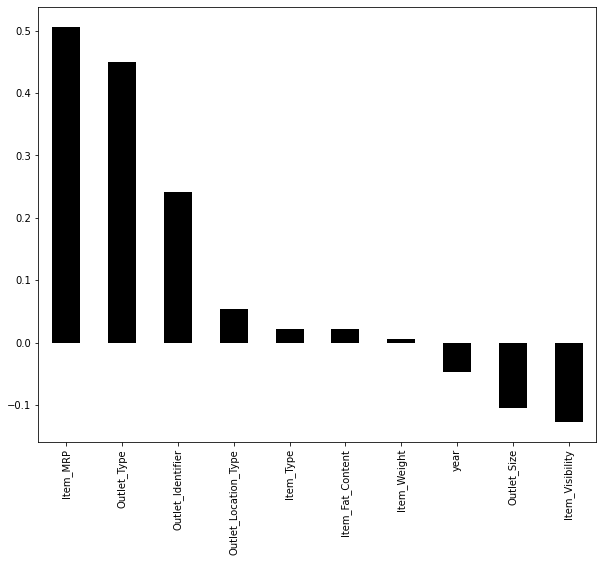

In [88]:
plt.figure(figsize = (10,8))
df_train.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'k')

### From above visualization we find that Outlet size and item visibility having positive correlation rest dataset having negative correlation with the datset

### Using Get Dummies for better prediction

In [89]:
df_train = pd.get_dummies(df_train, columns = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Type'])
df_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales,year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.016047,4,249.8092,9,1,8.225808,14,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,3,1,6.096776,4,0,1,0,0,1,0,0,1,0
2,17.50,0.016760,10,141.6180,9,1,7.648868,14,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,6,182.0950,0,1,6.597664,15,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,9,53.8614,1,0,6.903451,26,1,0,0,0,1,0,1,0,0


In [90]:
df_test = pd.get_dummies(df_test, columns = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Type'])
df_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,20.750000,0.007565,13,107.8622,9,1,14,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,4,87.3198,2,1,6,0,1,0,1,0,0,1,0,0
2,14.600000,0.099575,11,241.7538,0,1,15,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,13,155.0340,2,1,6,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,4,234.2300,5,1,28,0,1,0,0,1,0,0,0,1


# Dividing Data for feature selection

In [133]:
x = df_train.drop('Item_Outlet_Sales', axis = 1)
y = df_train['Item_Outlet_Sales']

In [134]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (8372, 16)
Shape of y (8372,)


In [149]:
x.isnull().sum()

Item_Weight               0
Item_Visibility           0
Item_Type                 0
Item_MRP                  0
Outlet_Identifier         0
Outlet_Size               0
year                      0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
dtype: int64

# Removing Skewness

In [136]:
from sklearn.preprocessing import PowerTransformer
pow = PowerTransformer('yeo-johnson')

In [137]:
float = x.select_dtypes(include='float').columns

In [144]:
for i in float:
    print(  i , ': ',x[i].skew())

Item_Weight :  0.08985737245710891
Item_Visibility :  -0.24373051399940243
Item_MRP :  0.12586219006504049


In [145]:
for i in float:
    print(i, ';',df_test[i].skew())

Item_Weight ; -0.0013607593984392564
Item_Visibility ; -0.36970803119166995
Item_MRP ; -0.14190881117536588


In [140]:
# item visibility show skewness greater that +-0.5 hence we need to fix it

x['Item_Visibility'] = np.sqrt(x['Item_Visibility'])
df_test['Item_Visibility'] = np.sqrt(df_test['Item_Visibility'])

In [143]:
x_skew = pow.fit_transform(x)

In [147]:
df_test = pow.fit_transform(df_test)

In [148]:
x = pd.DataFrame(x_skew, columns = x.columns)
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,-0.818982,-1.010822,-0.712968,1.624479,1.420678,-0.281186,0.071259,0.736074,-0.736074,1.622376,-0.70603,-0.802990,-0.354147,0.707930,-0.352864,-0.354574
1,-1.727709,-0.901785,1.506201,-1.614168,-0.570112,-0.281186,-1.643820,-1.358559,1.358559,-0.616380,-0.70603,1.245345,-0.354147,-1.412568,2.833952,-0.354574
2,1.081042,-0.985993,0.684843,0.069267,1.420678,-0.281186,0.071259,0.736074,-0.736074,1.622376,-0.70603,-0.802990,-0.354147,0.707930,-0.352864,-0.354574
3,1.440248,-2.074142,-0.215797,0.682494,-1.826884,-0.281186,0.189125,-1.358559,1.358559,-0.616380,-0.70603,1.245345,2.823686,-1.412568,-0.352864,-0.354574
4,-0.913614,-2.074142,0.468624,-1.495054,-1.364926,-1.919148,1.226454,0.736074,-0.736074,-0.616380,-0.70603,1.245345,-0.354147,0.707930,-0.352864,-0.354574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,-1.462561,0.034796,1.306556,1.144657,-1.364926,-1.919148,1.226454,0.736074,-0.736074,-0.616380,-0.70603,1.245345,-0.354147,0.707930,-0.352864,-0.354574
8368,-1.056231,-0.174926,-1.923889,-0.478384,0.797391,-0.281186,-0.320442,-1.358559,1.358559,-0.616380,1.41637,-0.802990,-0.354147,0.707930,-0.352864,-0.354574
8369,-0.494103,-0.452935,0.246990,-0.885098,0.473275,1.402403,-0.623035,0.736074,-0.736074,-0.616380,1.41637,-0.802990,-0.354147,0.707930,-0.352864,-0.354574
8370,-1.368139,1.521477,1.306556,-0.564699,-0.570112,-0.281186,-1.643820,-1.358559,1.358559,-0.616380,-0.70603,1.245345,-0.354147,-1.412568,2.833952,-0.354574


In [150]:
df_test = pd.DataFrame(df_test, columns = x.columns)

# Checking Multicollinearity of the Dataset

In [151]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [153]:
calc_vif(x)

,Variance,VIF Factor
0,Item_Weight,1.002715
1,Item_Visibility,1.031857
2,Item_Type,1.026224
3,Item_MRP,1.003163
4,Outlet_Identifier,5.003595
5,Outlet_Size,2.739948
6,year,7.242009
7,Item_Fat_Content_0,inf
8,Item_Fat_Content_1,inf
9,Outlet_Location_Type_0,inf


# VIF Factor is in range hence no need to remove any dataset

# Scaling Dataset

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)

In [158]:
x = x_scaler

# Feature Selection
Since output variables having continuos variables hence we use regressor model

In [160]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [180]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.40)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(r2_score(y_train, pred_train)*100,1) == round(r2_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training r2_score is:-", r2_score(pred_train, y_train)*100)
                print("Testing r2_score is:-", r2_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = r2_score(pred_train, y_train)
        Test_accuracy = r2_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
        print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
        print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
        
    def cross_val_score(model, x, y):
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value)

# Model 1 Linear Regression

In [181]:
model = LinearRegression()
best_model.best_fit(x, y, model)

At random_state:- 29
Training r2_score is:- 57.94278489945236
Testing r2_score is:- 57.882424222382966


At random_state:- 49
Training r2_score is:- 57.9118118044884
Testing r2_score is:- 58.00597570154109


At random_state:- 60
Training r2_score is:- 57.853363920733614
Testing r2_score is:- 57.183726055651384


At random_state:- 163
Training r2_score is:- 58.04985733730826
Testing r2_score is:- 58.161088576147414


At random_state:- 176
Training r2_score is:- 57.856980113811844
Testing r2_score is:- 56.644083823792165


Best fit random_state_values [29, 49, 60, 163, 176]


In [183]:
best_model.final_model(x, y, model, 58)

At random state 58 model giving best accuracy score 

Training accuracy:-  57.42875992697745
Testing accuracy:-  58.99691340194029


--------------------------------------
Mean squared error:-  0.26475960837796503
Mean absolute error:-  0.39819472645601434
Root Mean squared error:- 0.5145479650897135


In [184]:
best_model.cross_val_score(model, x, y)

cross_val_score 70.18206198576225 at cv = 2
cross_val_score 70.26612809574951 at cv = 3
cross_val_score 70.24753488532924 at cv = 4
cross_val_score 70.27966545446301 at cv = 5
cross_val_score 70.29889854391378 at cv = 6
cross_val_score 70.30857021979176 at cv = 7


# Model 2 SGDRegressor

In [185]:
model = SGDRegressor()
best_model.best_fit(x, y, model)

At random_state:- 2
Training r2_score is:- 56.7494179862138
Testing r2_score is:- 56.51218593935246


At random_state:- 49
Training r2_score is:- 55.87773957268561
Testing r2_score is:- 56.00240991960342


At random_state:- 55
Training r2_score is:- 57.782147162590135
Testing r2_score is:- 57.53195138608538


At random_state:- 73
Training r2_score is:- 57.75481676561607
Testing r2_score is:- 59.15517434754274


At random_state:- 163
Training r2_score is:- 57.80101378514564
Testing r2_score is:- 57.95068564402954


At random_state:- 164
Training r2_score is:- 58.26246148228713
Testing r2_score is:- 58.053185008907924


At random_state:- 176
Training r2_score is:- 57.970721127755674
Testing r2_score is:- 56.664712910252454


Best fit random_state_values [2, 49, 55, 73, 163, 164, 176]


In [186]:
best_model.final_model(x, y, model, 164 )

At random state 164 model giving best accuracy score 

Training accuracy:-  58.49155674708737
Testing accuracy:-  58.21106930468291


--------------------------------------
Mean squared error:-  0.27760198813112724
Mean absolute error:-  0.4073890808263987
Root Mean squared error:- 0.5268794816000404


In [187]:
best_model.cross_val_score(model, x, y)

cross_val_score 70.00542821330627 at cv = 2
cross_val_score 70.07453650467681 at cv = 3
cross_val_score 70.01340502371282 at cv = 4
cross_val_score 70.10846375035837 at cv = 5
cross_val_score 70.13375500400444 at cv = 6
cross_val_score 70.23787635321774 at cv = 7


# Model 3 Ridge Regression

In [188]:
best_model.best_fit(x, y, model)

At random_state:- 49
Training r2_score is:- 57.69253716704892
Testing r2_score is:- 57.926367306330405


At random_state:- 87
Training r2_score is:- 57.404253758498534
Testing r2_score is:- 58.18708952727059


At random_state:- 163
Training r2_score is:- 56.930547164781856
Testing r2_score is:- 56.93878098084233


Best fit random_state_values [49, 87, 163]


In [189]:
best_model.final_model(x, y, model, 87)

At random state 87 model giving best accuracy score 

Training accuracy:-  57.77081053702244
Testing accuracy:-  60.72829437547149


--------------------------------------
Mean squared error:-  0.26666613948276435
Mean absolute error:-  0.40069306632983964
Root Mean squared error:- 0.5163972690504515


In [190]:
best_model.cross_val_score(model, x, y)

cross_val_score 69.9247388526512 at cv = 2
cross_val_score 70.18723223246708 at cv = 3
cross_val_score 70.06882186715445 at cv = 4
cross_val_score 70.2163592963418 at cv = 5
cross_val_score 70.25065602340469 at cv = 6
cross_val_score 70.18729536450718 at cv = 7


# Model 4 Decision Tree Regressor

In [179]:
model = DecisionTreeRegressor()

best_model.best_fit(x, y, model)

Best fit random_state_values []


### Checking with Graph

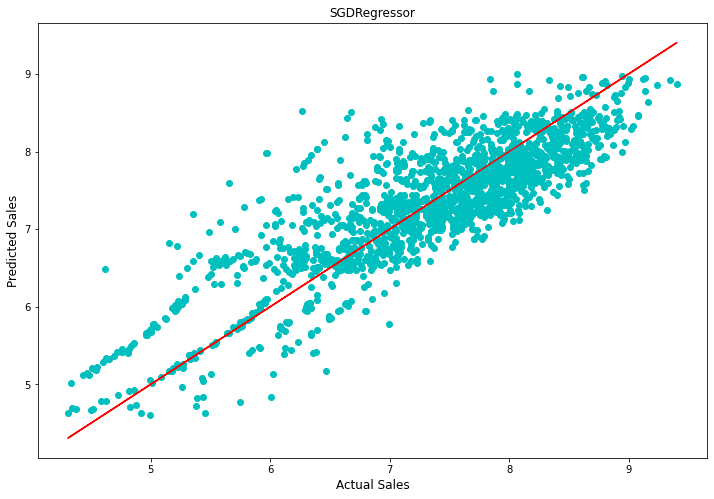

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 164 )
final_model = SGDRegressor()
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
plt.figure(figsize = (12, 8))
plt.scatter(x = y_test, y  = final_pred, color = 'c')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('Actual Sales', fontsize = 12)
plt.ylabel('Predicted Sales', fontsize = 12)
plt.title('SGDRegressor')
plt.show()

### Deploy Model

In [192]:
import pickle

filename = "Bigmart.pkl"
pickle.dump(final_model, open(filename, 'wb'))

In [199]:
load = pickle.load(open('Bigmart.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.7151341297590551
